In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
boston_dataset = pd.read_csv("/Users/varshitanukala/Documents/3rd_2/DM practical/exp 5/HousingData.csv")

In [3]:
boston_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
boston_dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

<Axes: >

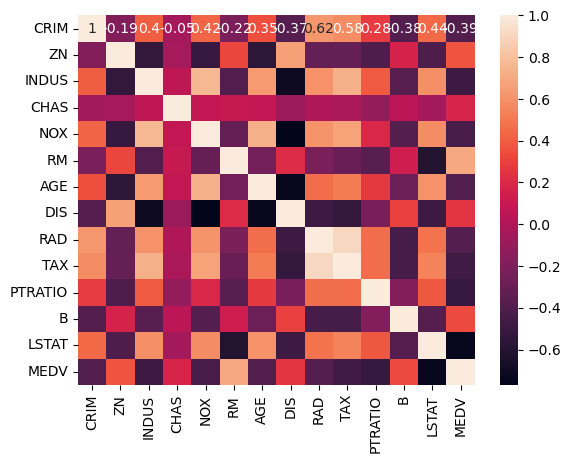

In [5]:
correlation_matrix = boston_dataset.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

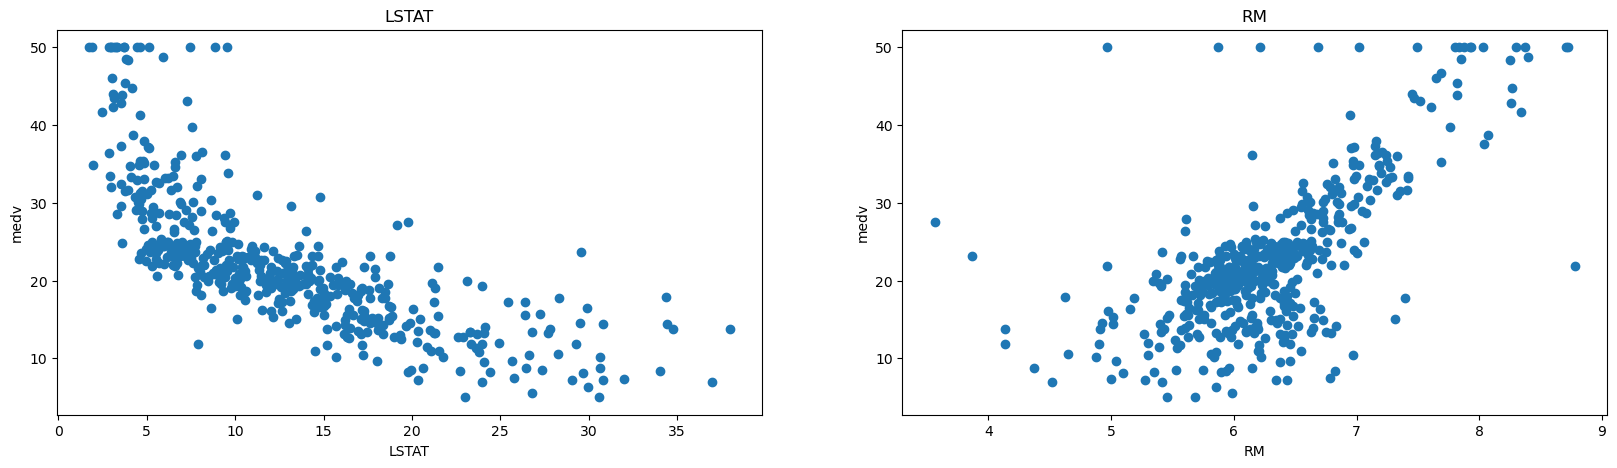

In [6]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston_dataset['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston_dataset[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

In [7]:
X = pd.DataFrame(np.c_[boston_dataset['LSTAT'], boston_dataset['RM']], columns = ['LSTAT','RM'])
Y = boston_dataset['MEDV']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm



In [10]:

lin_model = LinearRegression()


In [11]:

X_train = X_train.fillna(0)  # Replace NaNs with 0 (or another suitable value)
Y_train = Y_train.fillna(0)

X_train = X_train.astype(float)  # Convert to float if necessary
Y_train = Y_train.values.ravel()  # Convert to a flattened 1D array

lin_model.fit(X_train, Y_train)


LinearRegression()

In [12]:
model = sm.OLS(Y_train, X_train).fit()

In [13]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              3209.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                   7.43e-248
Time:                        00:09:34   Log-Likelihood:                         -1293.2
No. Observations:                 404   AIC:                                      2590.
Df Residuals:                     402   BIC:                                      2598.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------